## 线性回归
主要内容：
- 线性回归方程实现
- 梯度下降效果
- 对比不同梯度下降策略
- 建模曲线分析
- 过拟合与欠拟合
- 正则化的作用
- 提前停止策略

In [413]:
import numpy as np
import os
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams["axes.labelsize"] = 14
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12
import warnings
warnings.filterwarnings('ignore')

## 回归方程：
当作是一个巧合就行了，机器学习中核心思想是迭代更新
![image.png](./source/image/image.png)

In [414]:
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)

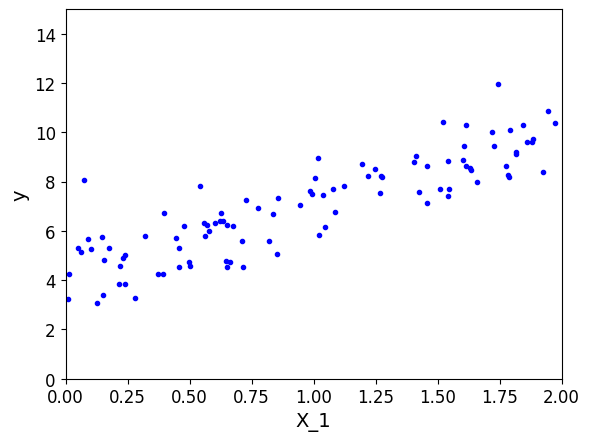

In [415]:
plt.plot(
    X,
    y,
    "b."
)
plt.xlabel("X_1")
plt.ylabel("y")
plt.axis([0,2,0,15])
plt.show()

In [416]:
X_b = np.c_[np.ones((100,1)),X]
theta_nest = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [417]:
theta_nest

array([[4.21699952],
       [2.89830958]])

In [418]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_prodict = X_new_b.dot(theta_nest)
y_prodict

array([[ 4.21699952],
       [10.01361869]])

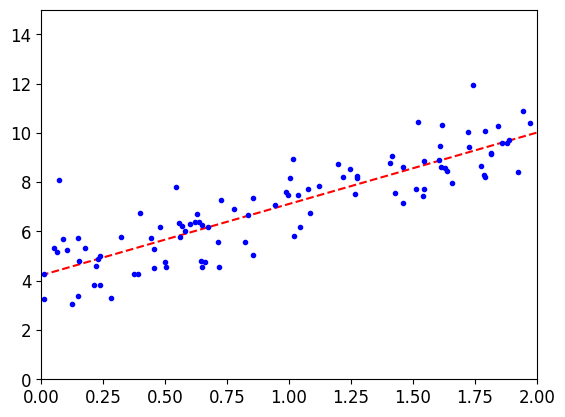

In [419]:
plt.plot(
    X_new,
    y_prodict,
    "r--"
)

plt.plot(
    X,
    y,
    "b."
)

plt.axis([0,2,0,15])
plt.show()

In [420]:
from sklearn.linear_model import LinearRegression
linearRegression = LinearRegression()
linearRegression.fit(X,y)
print(linearRegression.coef_)
print(linearRegression.intercept_)

[[2.89830958]]
[4.21699952]


## 批量梯度下降
核心解决方案

In [421]:
eta = 0.1
n_iterations = 1000
m = 100
theta = np.random.rand(2,1)
for iteration in range(n_iterations):
    gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [422]:
theta

array([[4.21699952],
       [2.89830958]])

In [423]:
X_new_b.dot(theta)

array([[ 4.21699952],
       [10.01361869]])

In [424]:
theta_path_bgd = []
def plot_gradient_descent(theta, eta,theta_path = None):
    m = len(X_b)
    plt.plot(
        X,
        y,
        "b."
    )
    
    n_iterations = 1000
    for _ in range(n_iterations):
        y_prodict = X_new_b.dot(theta)
        plt.plot(
            X_new,
            y_prodict,
            "b-"
        )
        gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path_bgd.append(theta)
            
    plt.xlabel("X_1")
    plt.axis([0,2,0,15])
    plt.title(f"eta = {eta}")

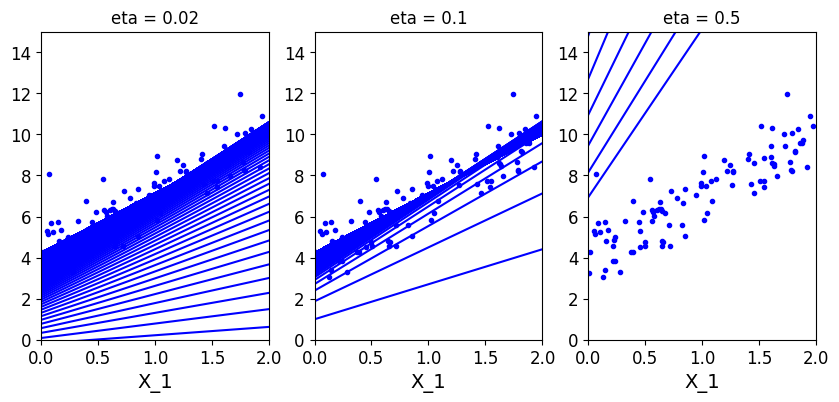

In [425]:
theta = np.random.randn(2,1)
plt.figure(figsize=(10,4))
plt.subplot(131)
plot_gradient_descent(theta, eta= 0.02)
plt.subplot(132)
plot_gradient_descent(theta, eta= 0.1, theta_path=theta_path_bgd)
plt.subplot(133)
plot_gradient_descent(theta, eta= 0.5)
plt.show()

## 随机梯度下降

![costImage.png](./source/image/costImage.png)

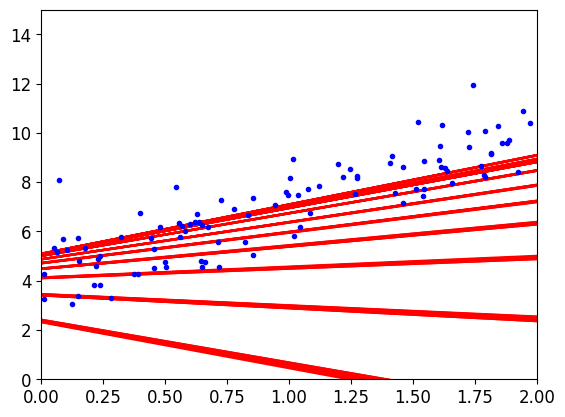

In [426]:
theta_path_sgd=[]
m = len(X_b)
n_epochs = 50

t0 = 5
t1 = 50

def learning_schedule(t):
    return t0 / (t1 + t)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        if epoch < 10 and i < 10:
            y_predict = X_new_b.dot(theta)
            plt.plot(
                X_new,
                y_predict,
                "r-"
            )
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index + 1]
        yi = y[random_index:random_index + 1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(n_epochs * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)
        
plt.plot(
    X,
    y,
    "b."
)
plt.axis([0,2,0,15])
plt.show()

## MiniBatch（小批量梯度下降）
实际情况 MiniBatch 用的较多，硬件/时间允许的情况下，minibatch越大越好

In [427]:
theta_path_mgd = []

n_epochs = 50

minibatch = 2 ** 4

theta = np.random.randn(2,1)

# np.random.seed(0)

t = 0
for epoch in range(n_epochs):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch):
        t += 1
        xi = X_b_shuffled[i:i+minibatch]
        yi= y_shuffled[i:i+minibatch]
        gradients = 2/minibatch * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [428]:
theta

array([[4.15975726],
       [2.94982931]])

## 3种策略的对比试验

In [429]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

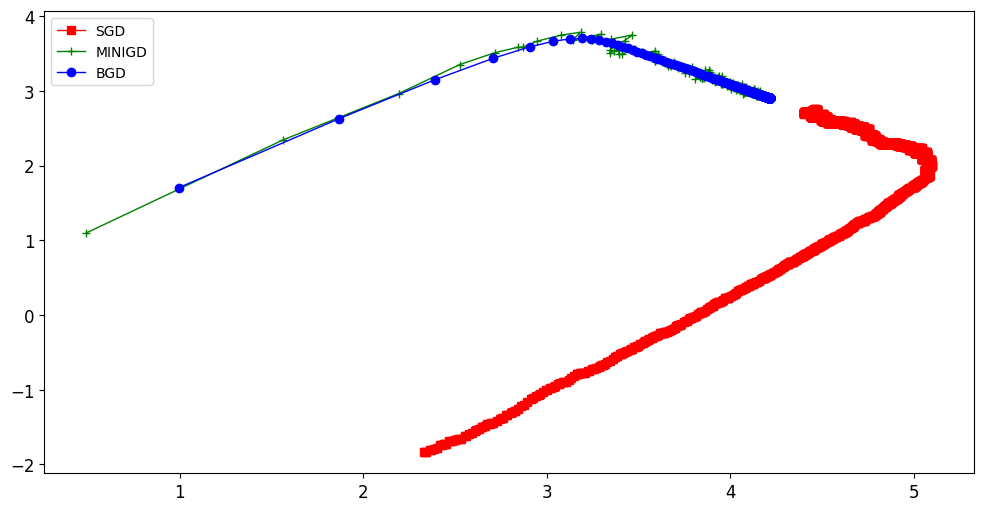

In [430]:
plt.figure(figsize=(12,6))
plt.plot(
    theta_path_sgd[:,0],
    theta_path_sgd[:,1],
    "r-s",
    linewidth= 1,
    label="SGD"
)

plt.plot(
    theta_path_mgd[:,0],
    theta_path_mgd[:,1],
    "g-+",
    linewidth= 1,
    label="MINIGD"
)

plt.plot(
    theta_path_bgd[:,0],
    theta_path_bgd[:,1],
    "b-o",
    linewidth= 1,
    label="BGD"
)

plt.legend(loc="upper left")
plt.show()

## 多项式回归

In [431]:
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X ** 2 + X + np.random.randn(m,1)

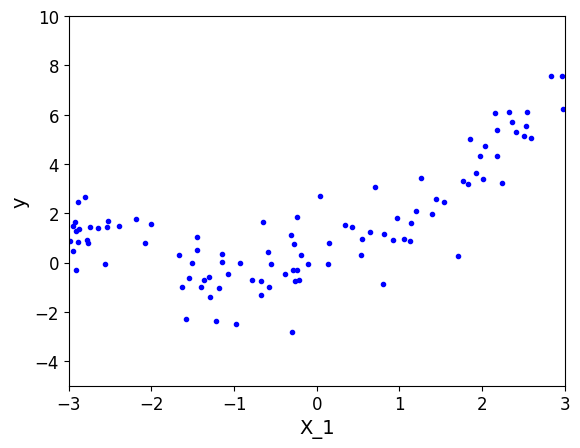

In [432]:
plt.plot(
    X,
    y,
    "b."
)

plt.xlabel("X_1")
plt.ylabel("y"),
plt.axis([-3,3,-5,10])
plt.show()

In [433]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

X[0]

array([1.92504142])

In [434]:
X_poly[0]

array([1.92504142, 3.70578447])

In [435]:
from sklearn.linear_model import LinearRegression
linearRegression = LinearRegression()
linearRegression.fit(X_poly,y)
print(linearRegression.coef_)
print(linearRegression.intercept_)

[[0.96887128 0.48531439]]
[0.12083741]


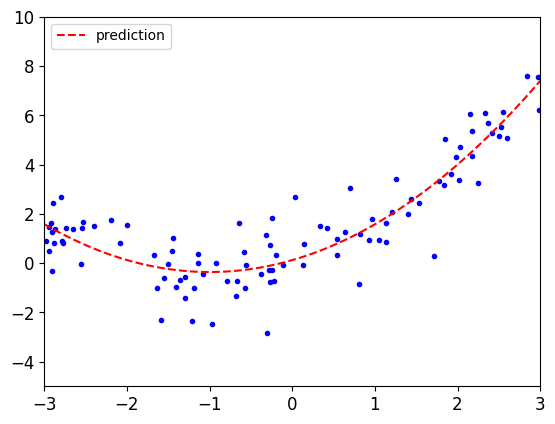

In [436]:
X_new = np.linspace(-3,3,100).reshape(100,1)
X_new_poly = poly_features.transform(X_new)
y_new = linearRegression.predict(X_new_poly)

plt.plot(
    X,
    y,
    "b."
)

plt.plot(
    X_new,
    y_new,
    "r--",
    label="prediction"
)

plt.axis([-3,3,-5,10])

plt.legend(loc="upper left")
plt.show()

## 多维操作
- 标准化
- 建模

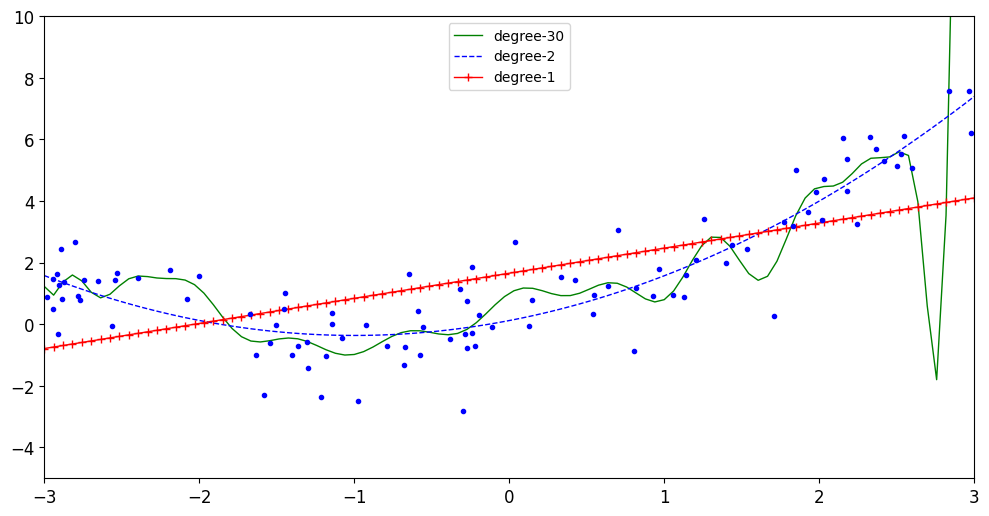

In [437]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

plt.figure(figsize=(12,6))

for style,width,degree in (("g-",1,30),("b--",1,2),("r-+",1,1)):
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    std = StandardScaler()
    linearRegression = LinearRegression()
    ploynomial_reg = Pipeline([("poly_features",poly_features),
              ("StandardScaler",std),
              ("linearRegression",linearRegression)])
    ploynomial_reg.fit(X,y)
    
    y_new_2 = ploynomial_reg.predict(X_new)
    
    plt.plot(
        X_new,
        y_new_2,
        style,
        label="degree-"+str(degree),
        linewidth=width
    )
plt.plot(
    X,
    y,
    "b."
)
plt.axis([-3,3,-5,10])
plt.legend(loc="upper center")
plt.show()

特征变化越复杂，得到的结果，过拟合风险越高，不建议做的太过复杂

## 数据样本数量对结果的影响

In [438]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2, random_state=0)
    
    train_errors, val_error = [],[]
    
    for m in range(1,len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m],y_train_predict[:m]))
        val_error.append(mean_squared_error(y_val,y_val_predict))
    plt.plot(
        np.sqrt(train_errors),
        "r-+",
        linewidth=2,
        label="train_error"
    )
    
    plt.plot(
        np.sqrt(val_error),
        "b-",
        linewidth=3,
        label="val_error"
    )
    
    plt.xlabel("Training set size")
    plt.ylabel("RMSE")
    
    plt.legend(loc="upper center")

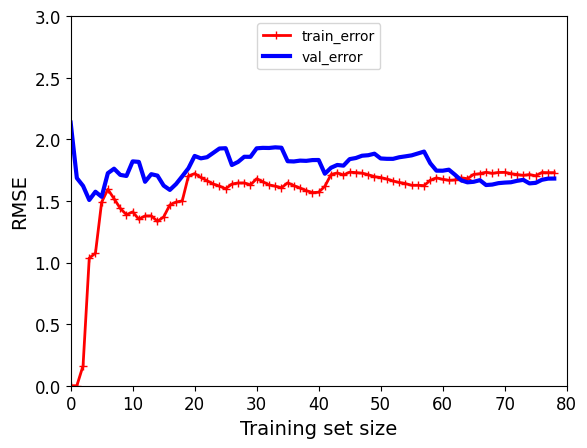

In [439]:
linearRegression = LinearRegression()

plot_learning_curves(linearRegression, X, y)
plt.axis([0,80,0,3])
plt.show()

数据量越小，训练集的效果会越好，但实际效果很一般。其实做模型的时候，需要参考测试集和验证集结果

## 多项式回归的过拟合风险

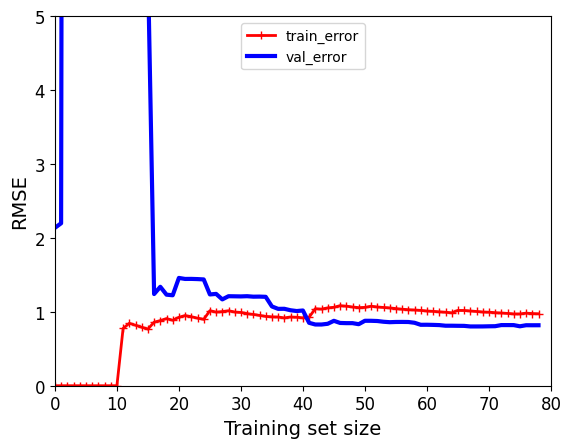

In [440]:
ploynomial_reg = Pipeline([("poly_features",PolynomialFeatures(degree=10, include_bias=False)),
              ("linearRegression",LinearRegression())])

plot_learning_curves(ploynomial_reg, X, y)

plt.axis([0,80,0,5])
plt.show()

越复杂，越过拟合

## 正则化
解决过拟合问题
对权重参数进行惩罚，让权重参数尽可能平滑一些；
有两种不同的方法进行正则化惩罚

In [441]:
from sklearn.linear_model import Ridge

np.random.seed(42)

m = 20

X = 3 * np.random.rand(m, 1)
y = 0.5 * X + np.random.randn(m, 1) / 1.5 + 1

X_new = np.linspace(0,3,100).reshape(100,1)

def plot_model(model_calss, polynomial, alphas, **model_kargs):
    for alpha,style in zip(alphas,("b-","g--","r:")):
        model = model_calss(alpha, **model_kargs)
        if polynomial:
            model = Pipeline([("poly_features",PolynomialFeatures(degree=10, include_bias=False)),
              ("StandardScaler",StandardScaler()),
              ("linearRegression",model)])
        model.fit(X,y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(
            X_new,
            y_new_regul,
            style,
            linewidth= lw,
            label=f"alpha = {alpha}"
        )
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper center")

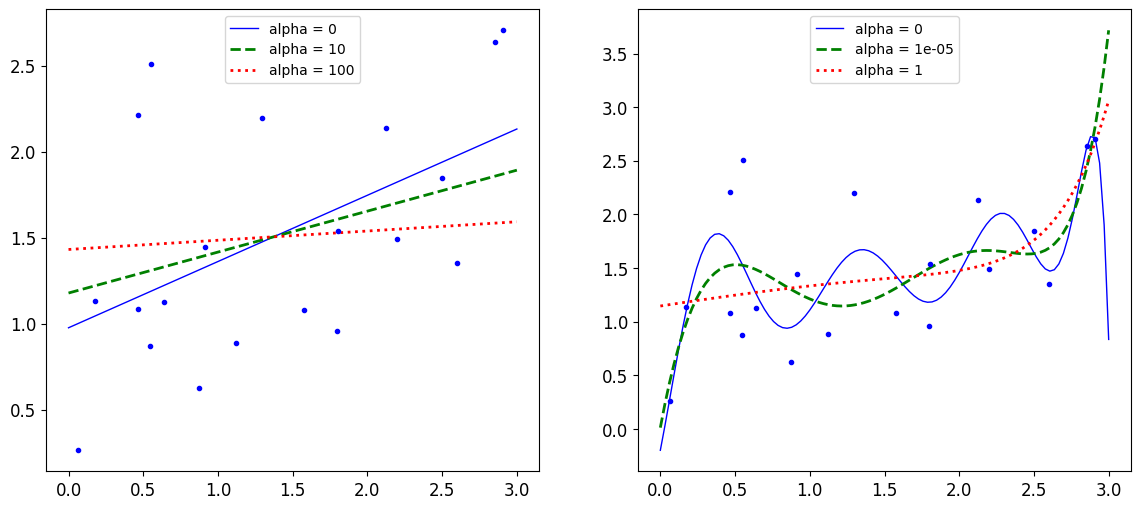

In [442]:
plt.figure(figsize=(14,6))

plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0,10,100))

plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0,10**-5,1))

plt.show()

惩罚力度越大，得到的 决策曲线越平稳

![zzh.png](./source/image/zzh.png)

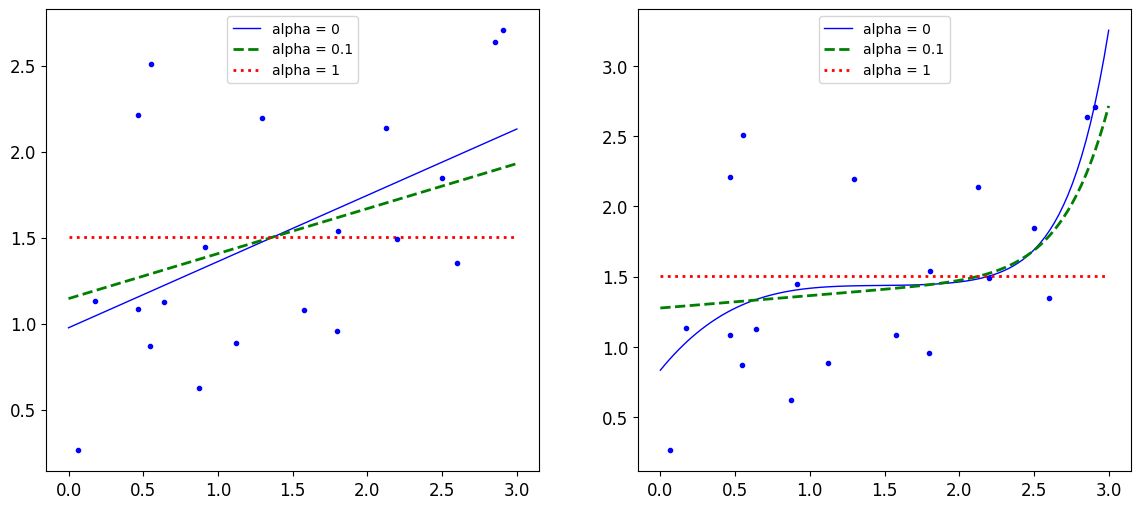

In [443]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(14,6))

plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0,0.1,1))

plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0,10**-1,1))

plt.show()

![lasso.png](./source/image/lasso.png)

多做实验，得出结果